+ Name: Lê Hoàng Anh Đức
+ ID: 11219268
+ Class: DSEB 63

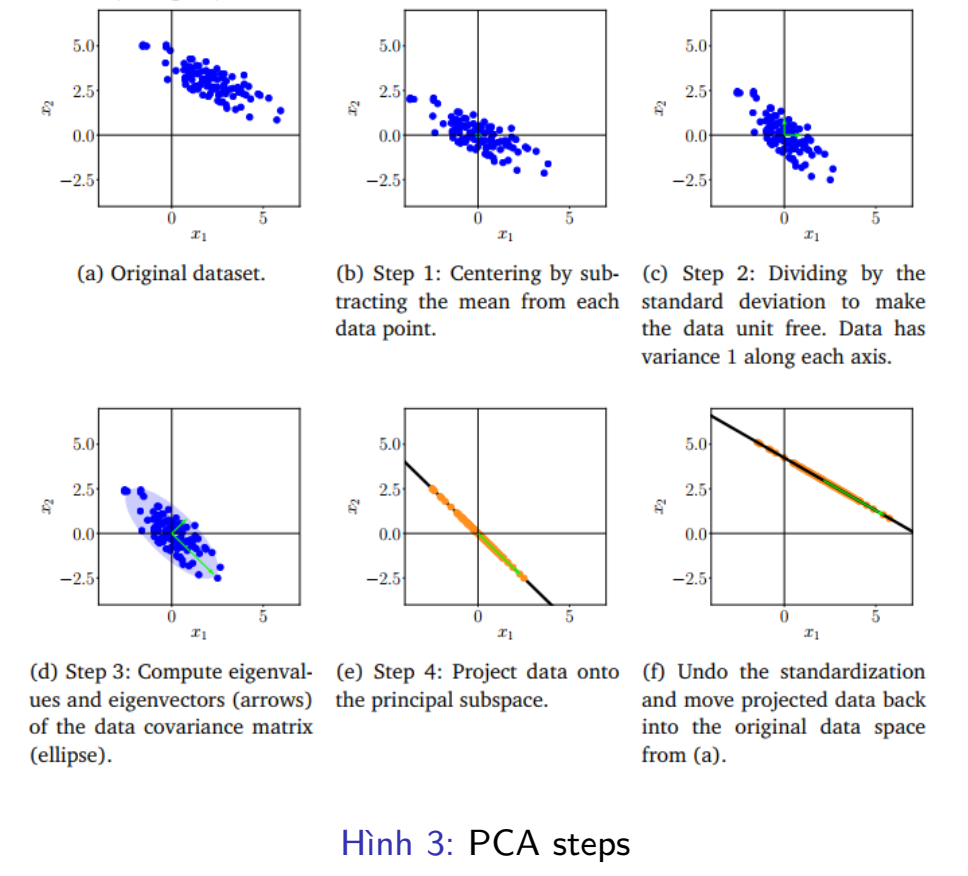

In [1]:
import numpy as np 

In [2]:
class PCA:
    def __init__(self,n_components):
        self._n_components = n_components
        self._components = None
        self._mean = None
        self._eigenvalues = None
    def fit(self, X):
        # no Label Y
        # means along column (feature)
        self._mean = np.mean(X, axis = 0)
        X = X - self._mean
        # covariance X^T.X instead of X.X^T due to computing cost in high dim case,
        # while still remain same eigenvector and eigen valúes
        cov = np.cov(X.T)

        # calculate eigenvectors, eigenvalues by numpy
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        # transpose engenvector for easier calculation
        eigenvectors = eigenvectors.T
        # sort data in each row (descending)
        indexes = np.argsort(eigenvalues)[::-1] # return the index of each point in sorted data 
        eigenvalues = eigenvalues[indexes]
        eigenvectors = eigenvectors[indexes]

        # chose the n components with highest information
        self._components = eigenvectors[:self._n_components]
        
        self._eigenvalues = eigenvalues
    def transform(self, X):
        X -= self._mean
        return np.dot(X, self._components.T)
    
    def scree_plot(self):
        pass

In [3]:
from sklearn import datasets
data = datasets.load_digits()
X = data.data
y = data.target

In [4]:
pca = PCA(2)
pca.fit(X)
X_pred = pca.transform(X)

In [5]:
X.shape

(1797, 64)

In [6]:
X_pred.shape

(1797, 2)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3600\3416303239.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.9, cmap=plt.cm.get_cmap("Set1", 3)


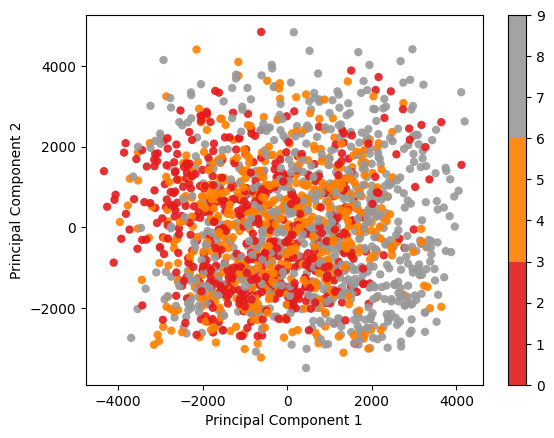

In [7]:
import matplotlib.pyplot as plt
x1 = X_pred[:, 0]
x2 = X_pred[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.9, cmap=plt.cm.get_cmap("Set1", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()